## Customer Churn Analysis

### Project focusing on data cleaning and preprocessing, data exploration and visualization
<p></p>

<p>Project Overview:</>

<p>This project focuses on data cleaning and preprocessing, exploration and visualization. Using a dataset from a telecom company that includes customer information, such as demographics, usage patterns, and whether they churned (i.e., left the company) or not, the goal is to prepare the data for analysis, explore key patterns and trends, and create visualizations to gain insights into factors influencing customer churn.</P>

<p>This was done with the following objectives in mind:</p>

<ol>
<li>Clean and preprocess the raw dataset to make it suitable for analysis.</li>
<li> Identify factors that may be associated with customer churn.</li>
<li> Communicate findings through informative visualizations
</ol>

### Cleaning and Preprocessing the data

### 1. Import all packages and load the data from csv

In [75]:
# import all packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
import plotly.express as px

In [34]:
# Loading the raw dataset
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Examine the data for missing values, duplicates, and outliers.

In [35]:
# Examining the data for missing values

missing_values = df.isna().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<p>The above output shows that there are no missing values in the dataset</p>

In [36]:
# Check for duplicates
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)
num_duplicates = len(duplicates)
print(f"Number of duplicate rows: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Number of duplicate rows: 0


<p>The result above indicates that there are no duplicate rows in the dataset</p> 

In [37]:
# Check for outliers
# Calculate the IQR (Interquartile Range)
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows where 'numeric_column' is an outlier
outliers = df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)]

# Display the rows with potential outliers
print("Rows with Potential Outliers:")
print(outliers)

Rows with Potential Outliers:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [38]:
# Filter out rows where 'tenure' is equal to 0 and assign the result back to 'df'
df = df[df['tenure'] != 0]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 3. Address duplicates, if any, and remove unnecessary columns

In [39]:
# Remove columns not needed (customerID, SeniorCitizen, Partner, Dependents, PaperlessBilling)

columns_to_remove = ['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']
df = df.drop(columns=columns_to_remove)
df.head()


,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


## 4. Encode categorical variables (e.g., one-hot encoding) for modeling purposes.

In [40]:
df_encoded = pd.get_dummies(df, columns = ['gender'])
df_encoded


,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,1,0
1,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No,0,1
2,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0,1
3,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,0,1
4,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check,84.80,1990.5,No,0,1
7039,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.9,No,1,0
7040,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check,29.60,346.45,No,1,0
7041,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check,74.40,306.6,Yes,0,1


## 5. Normalize or scale numeric features if needed

In [41]:
scaler = MinMaxScaler()
# min_max_scaler = MinMaxScaler()

df_encoded[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df_encoded[['MonthlyCharges', 'TotalCharges']])


## Data Exploration and Visualization


### 1. Perform descriptive statistics to summarize the dataset


In [42]:
# Perform descriptive statistics to summarize the dataset

summary_stats = df_encoded.describe()
summary_stats



,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,0.463166,0.261309,0.495307,0.504693
std,24.545260,0.299363,0.261571,0.500014,0.500014
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.172512,0.044155,0.000000,0.000000
50%,29.000000,0.518408,0.159090,0.000000,1.000000
75%,55.000000,0.712562,0.435719,1.000000,1.000000
max,72.000000,1.000000,1.000000,1.000000,1.000000


### 2. Explore the distribution of key variables, such as customer demographics (age, gender), usage patterns (monthly charges, total charges), and churn status

<p>Customer Demographic (Gender)</>

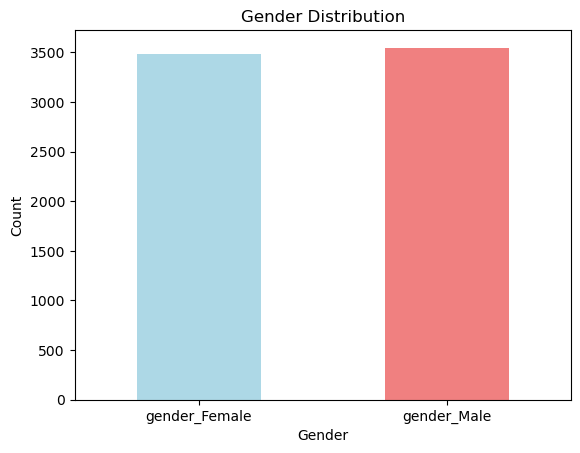

In [43]:
# Group the data by 'gender_Female' and 'gender_Male' and calculate counts
gender_counts = df_encoded[['gender_Female', 'gender_Male']].sum()
gender_counts

# Define custom colors for the bars
colors = ['lightblue', 'lightcoral']

# Create a bar plot with custom colors
gender_counts.plot(kind='bar', rot=0, color=colors)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

<p>Usage patterns (monthly charges and total charges)</p>

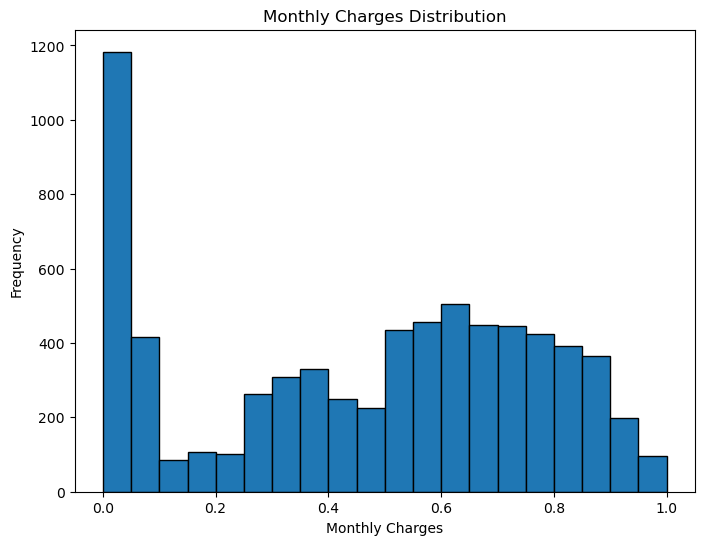

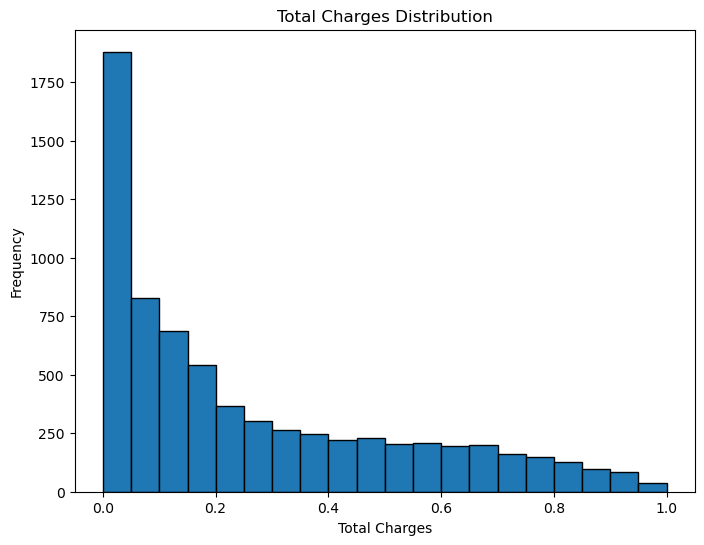

In [44]:
# Usage Patterns (Monthly Charges and Total Charges)

monthly_charge_stats = df['MonthlyCharges'].describe()
total_charge_stats = df['TotalCharges'].describe()
monthly_charge_stats
total_charge_stats

# Histogram for Monthly Charges
plt.figure(figsize=(8, 6))
plt.hist(df_encoded['MonthlyCharges'], bins=20, edgecolor='k')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution')
plt.show()

# Histogram for Total Charges
plt.figure(figsize=(8, 6))
plt.hist(df_encoded['TotalCharges'], bins=20, edgecolor='k')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Total Charges Distribution')
plt.show()


<p>Distribution of churn status</p>

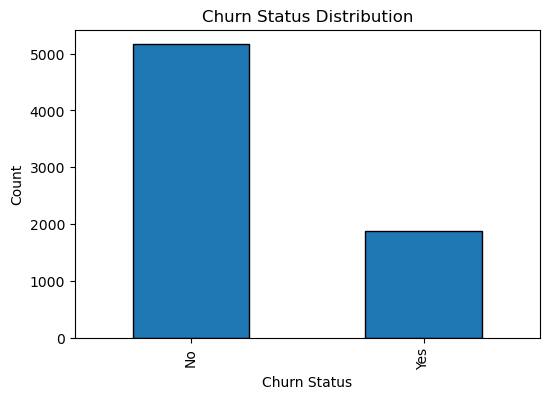

In [45]:
# Calculate the distribution of churn vs. non-churn
churn_distribution = df['Churn'].value_counts()
churn_distribution

# Visualize it with bar plot
plt.figure(figsize=(6, 4))
df_encoded['Churn'].value_counts().plot(kind='bar', edgecolor='k')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Status Distribution')
plt.show()

### 3. Calculate and visualize correlations between variables using a heatmap.

C:\Users\amadasu\AppData\Local\Temp\ipykernel_12940\3218954811.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


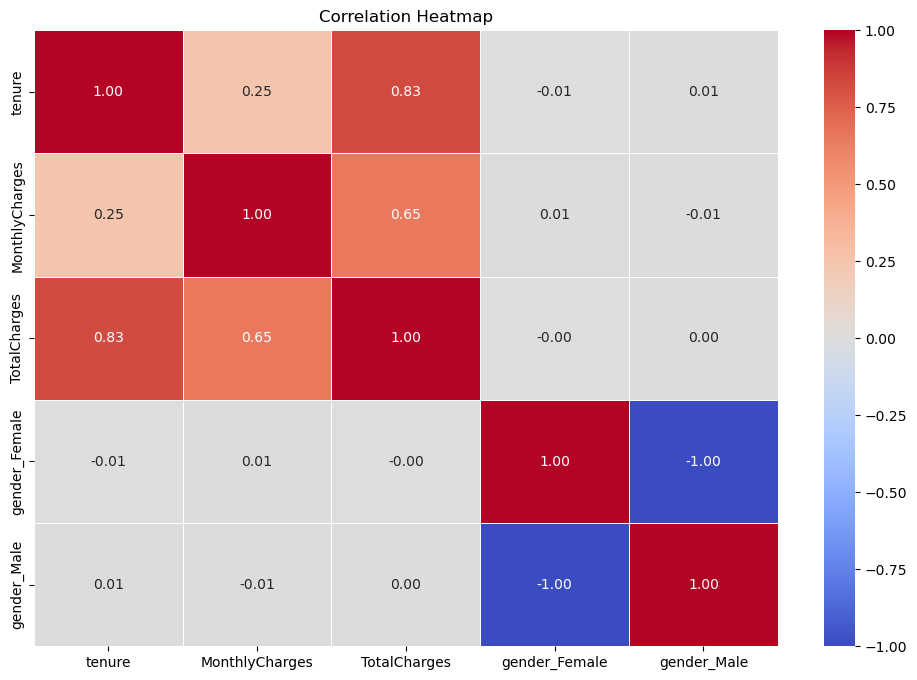

In [46]:
# Calculate and visualize correlations between variables using a heatmap.

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 4. Conduct hypothesis tests (t-tests) to compare differences between churned and non-churned customers

In [47]:
# churned customers
churned = df_encoded[df_encoded['Churn'] == 'Yes']['MonthlyCharges']
# Non-churned customers
non_churned = df_encoded[df_encoded['Churn'] == 'No']['MonthlyCharges']

# t-test to compare the means of churn and non churn groups
t_statistic, p_value = stats.ttest_ind(churned, non_churned, equal_var=False)

# Print the t-statistic and p-value
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("There is a statistically significant difference between churned and non-churned customers.")
else:
    print("There is no statistically significant difference between churned and non-churned customers.")


T-statistic: 18.340918790952585
P-value: 2.65735714451542e-72
There is a statistically significant difference between churned and non-churned customers.


<p>Summary tables and statistics for various customer segments</p>

In [48]:
# Create summary tables and statistics for various customer segments (e.g., by contract type, payment method).

# Group the data by Contract type and calculate summary statistics
contract_summary = df_encoded .groupby('Contract').agg({
    'MonthlyCharges': ['mean', 'median', 'std', 'count'],
    'TotalCharges': ['mean', 'median', 'std']
}).reset_index()

# Rename columns for clarity
contract_summary.columns = ['Contract', 'Mean_MonthlyCharges', 'Median_MonthlyCharges', 'Std_MonthlyCharges', 'Count_MonthlyCharges', 'Mean_TotalCharges', 'Median_TotalCharges', 'Std_TotalCharges']

# Print the summary table for contract segments
print("Summary Statistics by Contract Type:")
print(contract_summary)

# Group the data by Payment Method and calculate summary statistics
payment_summary = df_encoded.groupby('PaymentMethod').agg({
    'MonthlyCharges': ['mean', 'median', 'std', 'count'],
    'TotalCharges': ['mean', 'median', 'std']
}).reset_index()

# Rename columns for clarity
payment_summary.columns = ['PaymentMethod', 'Mean_MonthlyCharges', 'Median_MonthlyCharges', 'Std_MonthlyCharges', 'Count_MonthlyCharges', 'Mean_TotalCharges', 'Median_TotalCharges', 'Std_TotalCharges']

# Print the summary table for payment method segments
print("\nSummary Statistics by Payment Method:")
print(payment_summary)


Summary Statistics by Contract Type:
         Contract  Mean_MonthlyCharges  Median_MonthlyCharges  \
0  Month-to-month             0.479089               0.547264   
1        One year             0.465964               0.502488   
2        Two year             0.424103               0.459701   

   Std_MonthlyCharges  Count_MonthlyCharges  Mean_TotalCharges  \
0            0.267926                  3875           0.155834   
1            0.316710                  1472           0.348013   
2            0.345395                  1685           0.428125   

   Median_TotalCharges  Std_TotalCharges  
0             0.076246          0.186231  
1             0.304495          0.257296  
2             0.416011          0.296706  

Summary Statistics by Payment Method:
               PaymentMethod  Mean_MonthlyCharges  Median_MonthlyCharges  \
0  Bank transfer (automatic)             0.487120               0.547264   
1    Credit card (automatic)             0.480291               0.545274  

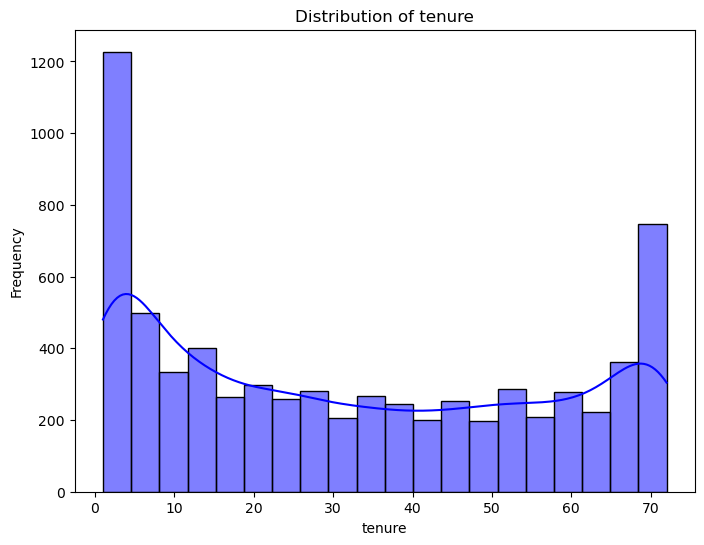

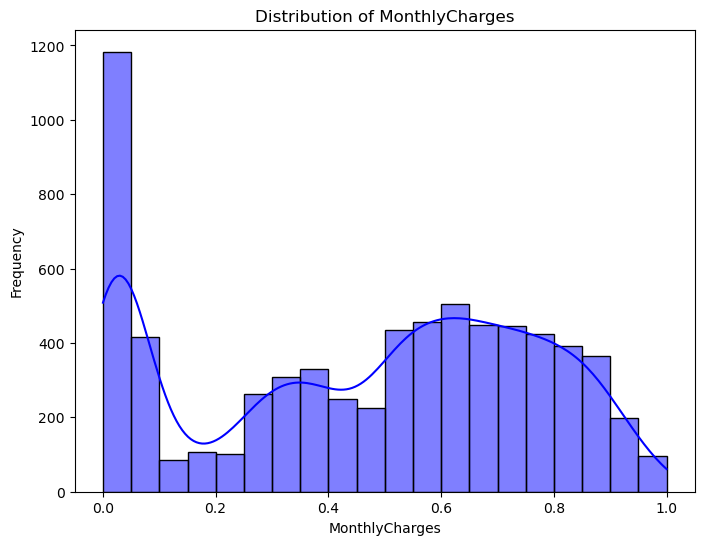

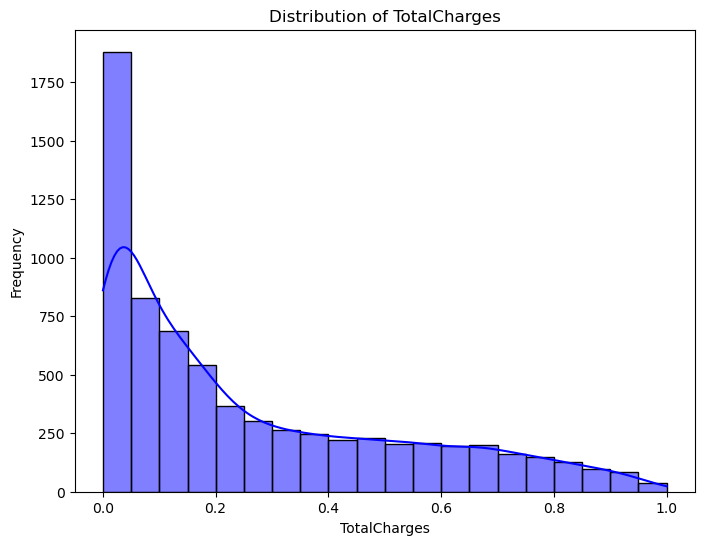

In [49]:
# Identify the numeric variables in df_encoded
numeric_variables = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Loop through the numeric variables and create distribution plots
for var in numeric_variables:
    plt.figure(figsize=(8, 6))
    
    # Create a distribution plot (you can choose between a histogram or density plot)
    sns.histplot(df_encoded[var], kde=True, bins=20, color='blue')
    
    # Set labels and title
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    
    plt.show()

### Distribution below shows the number of customers per each services as contained in the data and the number of customers who stay vs who left (Churn and non churcn)

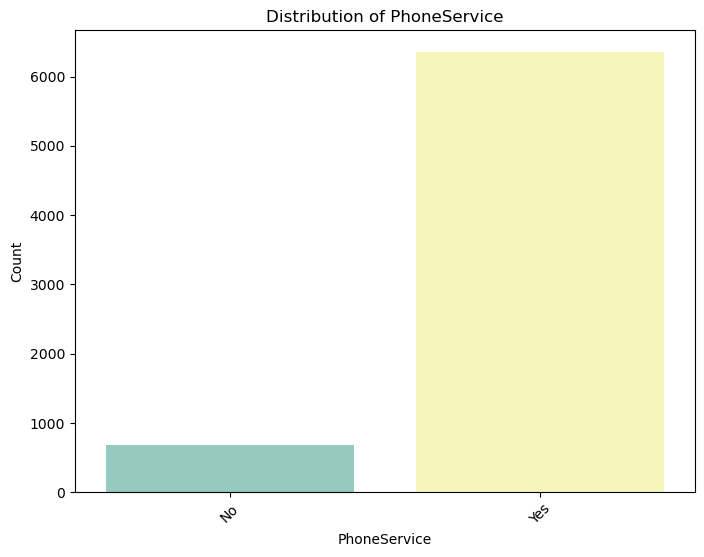

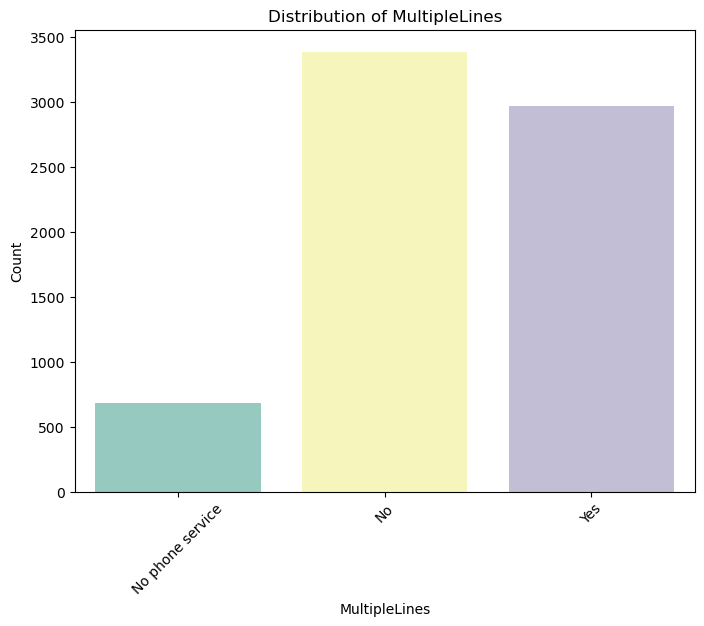

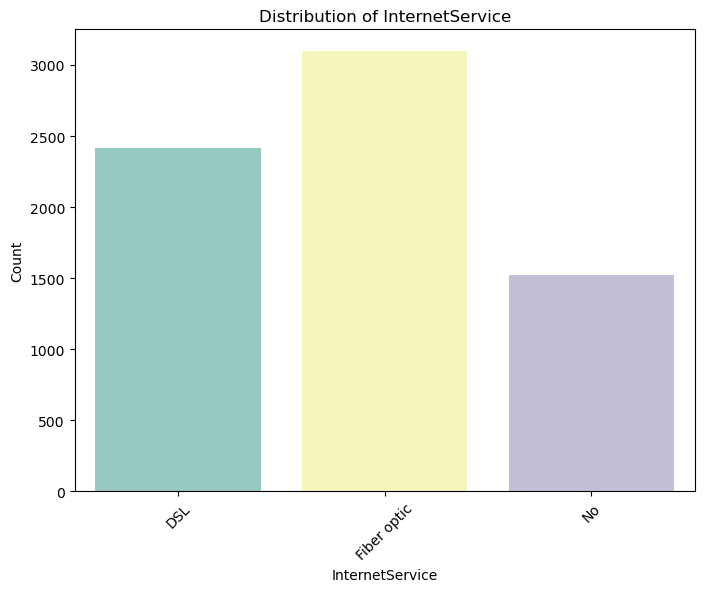

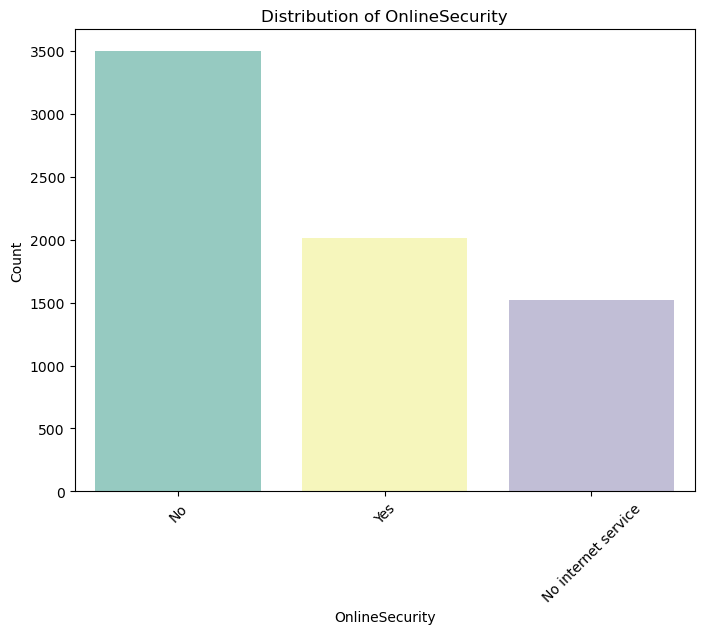

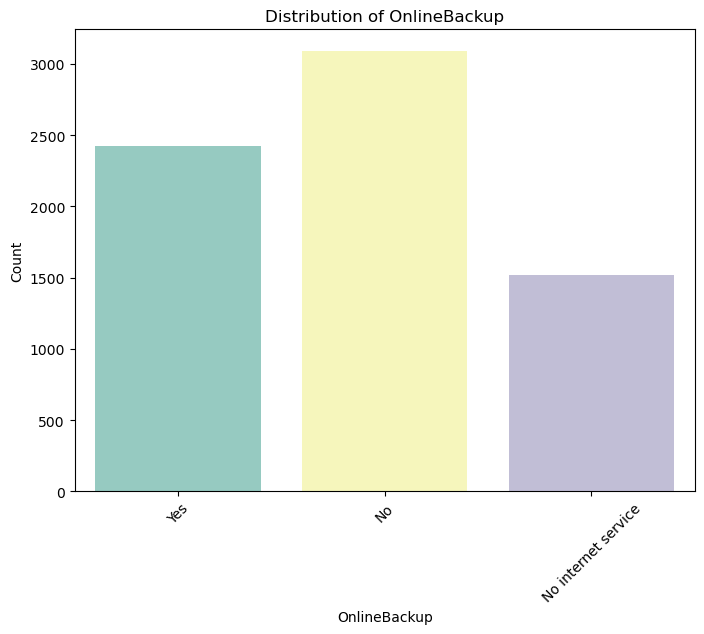

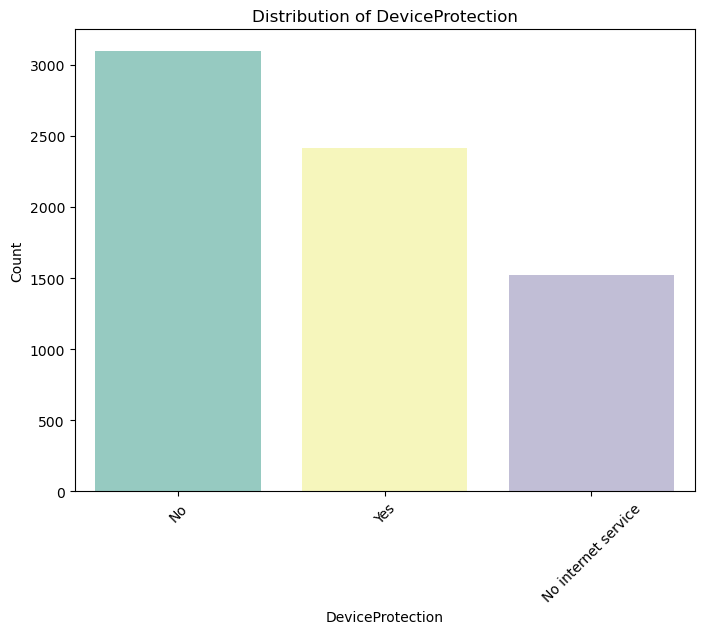

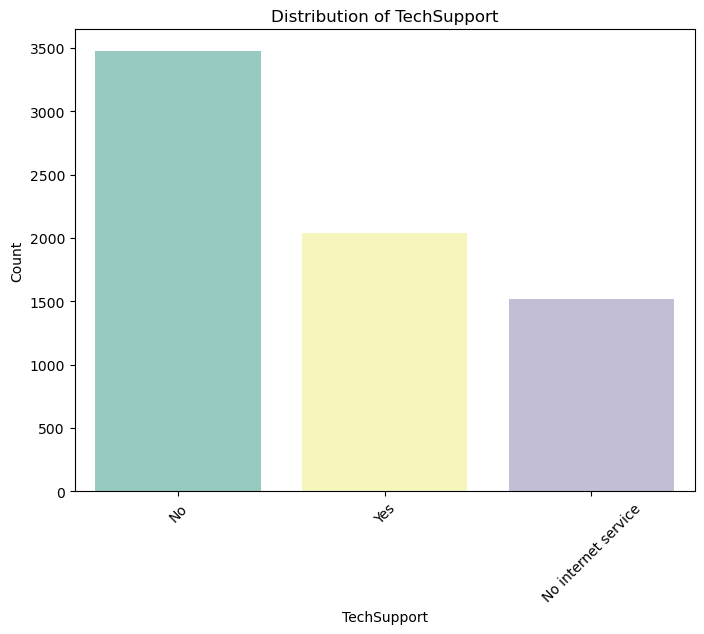

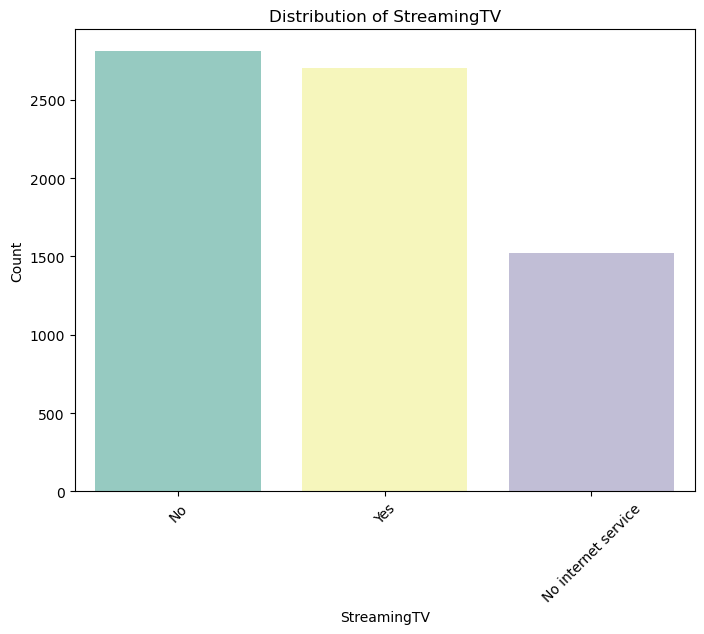

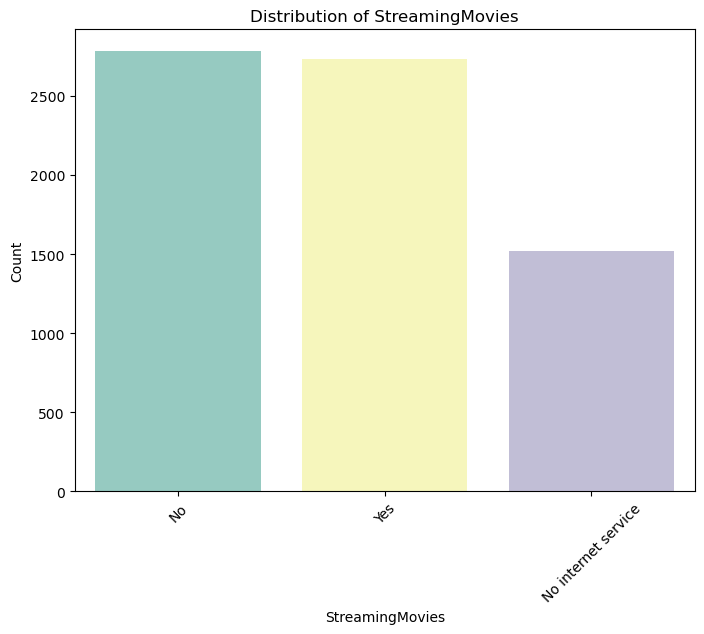

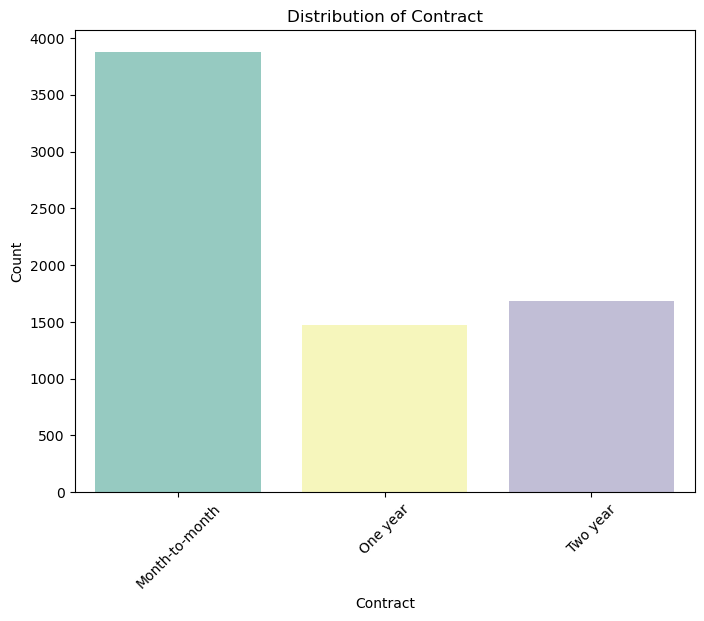

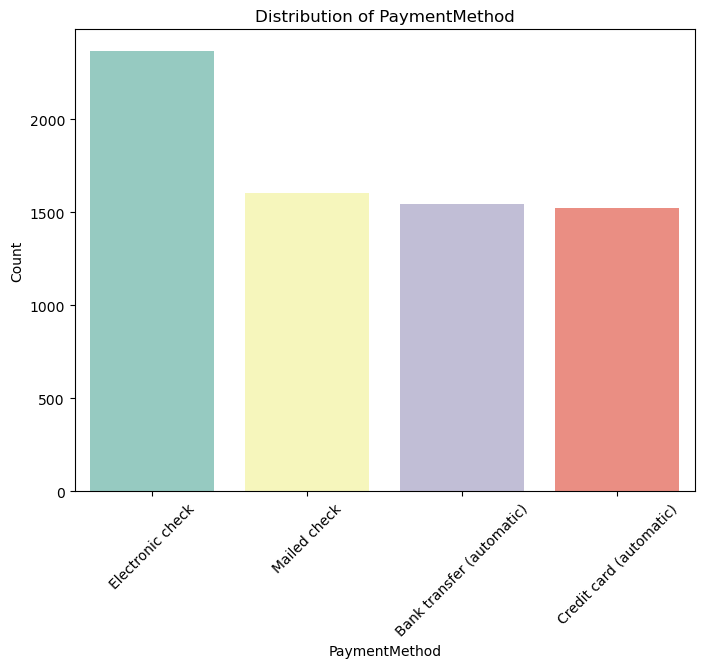

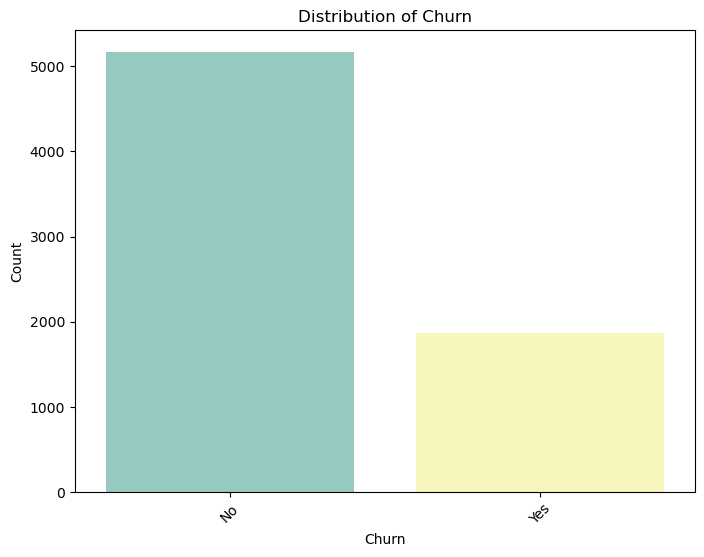

In [50]:
# Identify the categorical variables in df_encoded (excluding 'gender_Female' and 'gender_Male')
categorical_variables = df_encoded.select_dtypes(include=['object'])

# Loop through the categorical variables and create distribution plots
for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    
    # Create different types of distribution plots based on the variable type
    if len(df_encoded[var].unique()) <= 10:
        # If the variable has 10 or fewer unique values, create a countplot (bar plot)
        sns.countplot(data=df_encoded, x=var, palette='Set3')
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    else:
        # If the variable has more than 10 unique values, create a pie chart
        value_counts = df_encoded[var].value_counts()
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribution of {var}')
    
    plt.show()

#### Trends  of monthly charges over tenure

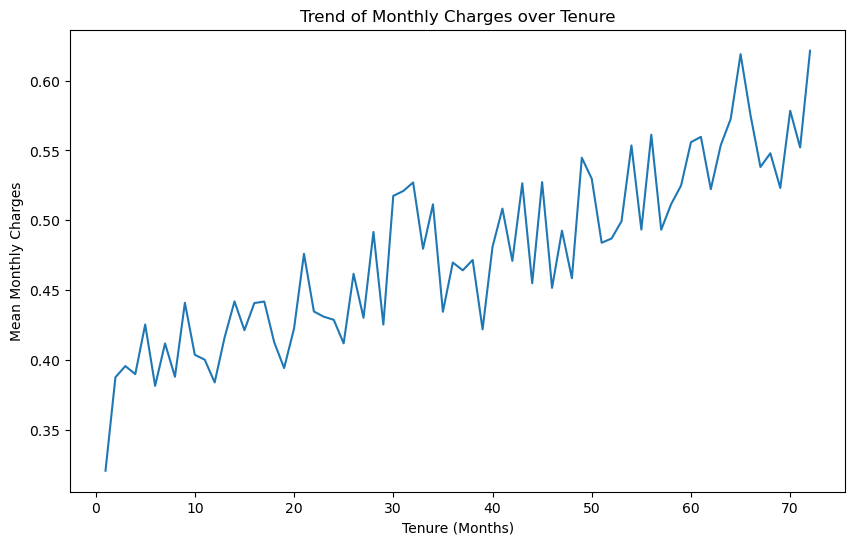

In [51]:
# Example: Compare 'tenure' (numeric) with the mean 'MonthlyCharges' (numeric) over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_encoded, x='tenure', y='MonthlyCharges', errorbar=None)
plt.title('Trend of Monthly Charges over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Mean Monthly Charges')
plt.show()


### Comparing payment methods with total charges

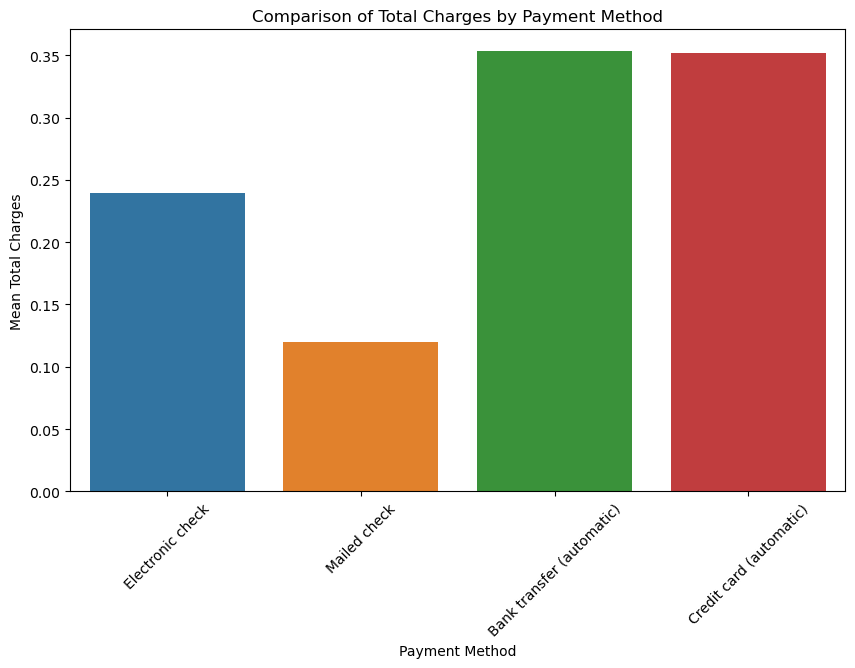

In [52]:
# Example: Compare 'PaymentMethod' (categorical) with the mean 'TotalCharges' (numeric)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_encoded, x='PaymentMethod', y='TotalCharges', errorbar=None)
plt.title('Comparison of Total Charges by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Mean Total Charges')
plt.xticks(rotation=45)
plt.show()

Churn customers vs Payment Method

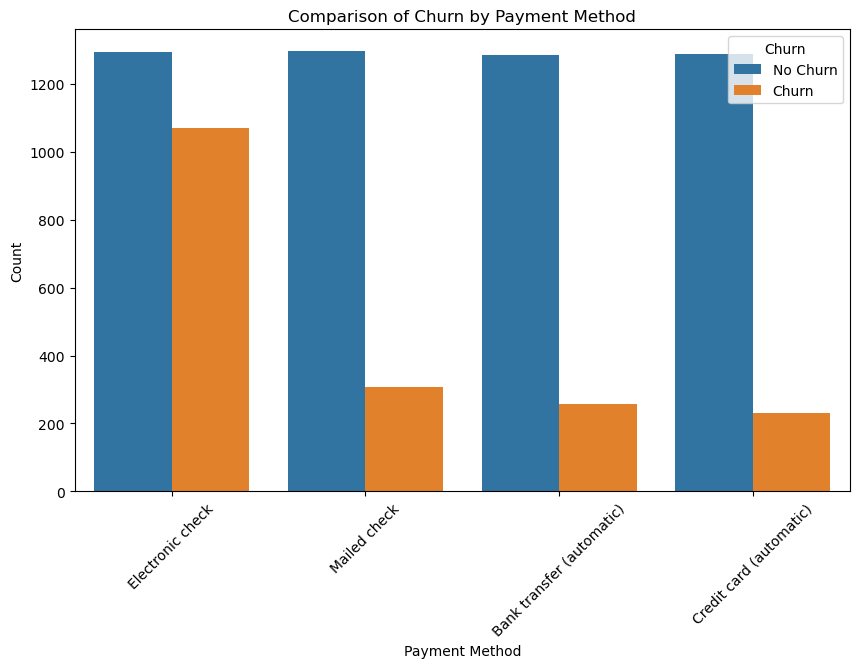

In [53]:
# Create a countplot to compare PaymentMethod with Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_encoded, x='PaymentMethod', hue='Churn')
plt.title('Comparison of Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()


Customers who use electronic check method are the highest among those who churns

### Contract vs monthly charges

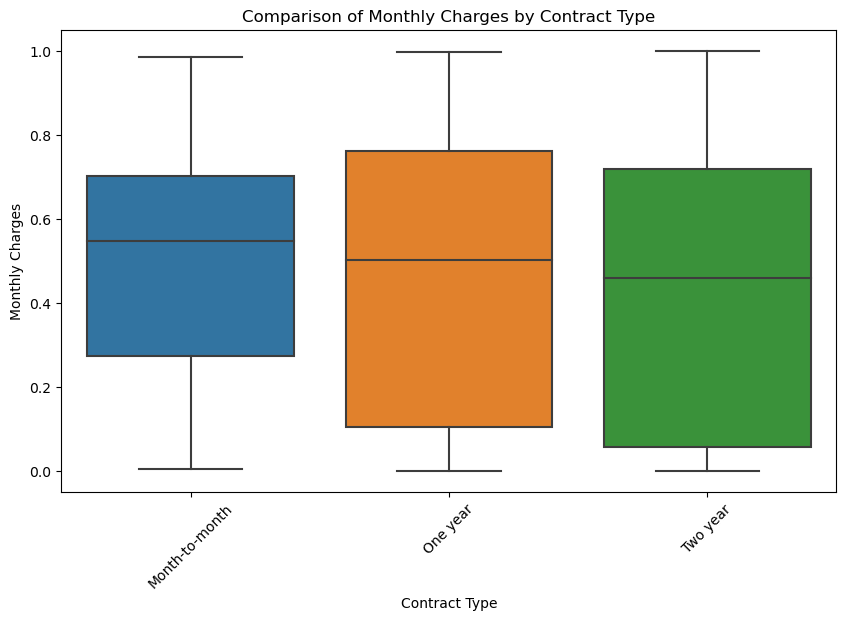

In [54]:
# Example: Compare 'Contract' (categorical) with 'MonthlyCharges' (numeric)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Contract', y='MonthlyCharges')
plt.title('Comparison of Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.xticks(rotation=45)
plt.show()

Monthly Charges by Contract Type and Churn

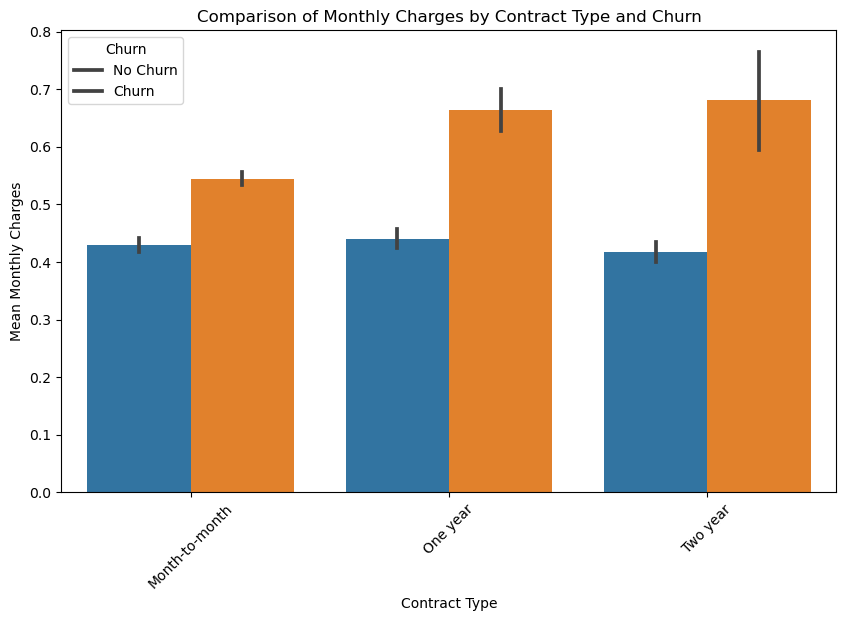

In [55]:
# Create a grouped barplot to compare MonthlyCharges by Contract and Churn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_encoded, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Comparison of Monthly Charges by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Mean Monthly Charges')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

### Comparing tenure with churn rate

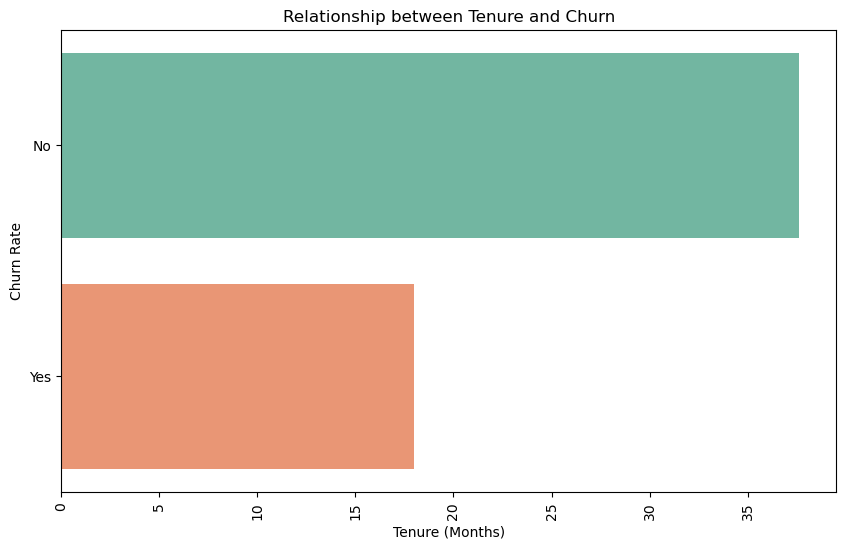

In [56]:
# Create a bar plot to show the relationship between 'tenure' and 'Churn'
plt.figure(figsize=(10, 6))
sns.barplot(data=df_encoded, x='tenure', y='Churn', errorbar=None, palette='Set2')
plt.title('Relationship between Tenure and Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.show()

### Proportion of churned vs. non-churned customers.

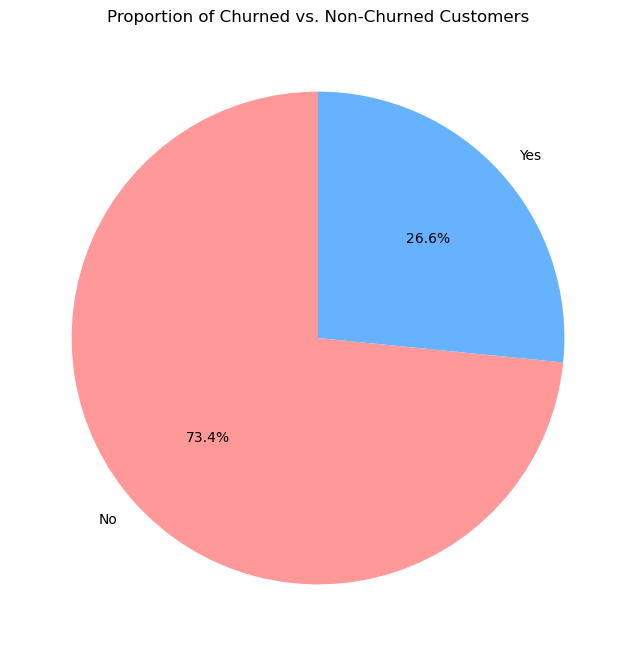

In [57]:
# Calculate the counts of churned and non-churned customers
churn_counts = df_encoded['Churn'].value_counts()

# Create a pie chart to visualize the proportion of churned vs. non-churned customers
plt.figure(figsize=(12, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])
plt.title('Proportion of Churned vs. Non-Churned Customers')
plt.show()

Comparing charges with the rate of churn

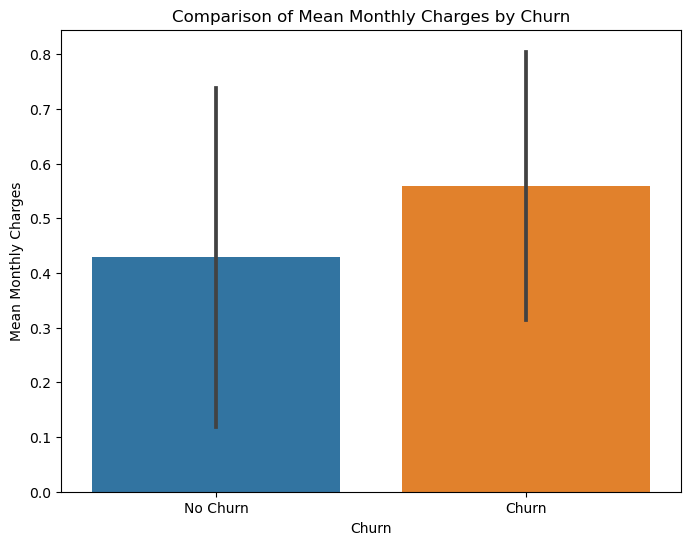

In [60]:

# Comparing  Monthly Charges with the rate of Churn
plt.figure(figsize=(8, 6))
sns.barplot(data=df_encoded, x='Churn', y='MonthlyCharges', errorbar="sd")
plt.title('Comparison of Mean Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Mean Monthly Charges')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()

From the above, there is a direct relationship between higher charges and rate of churn which means that as the charges increase, the number of customers who churn also increases

Comparism of the various services with the rate of churn

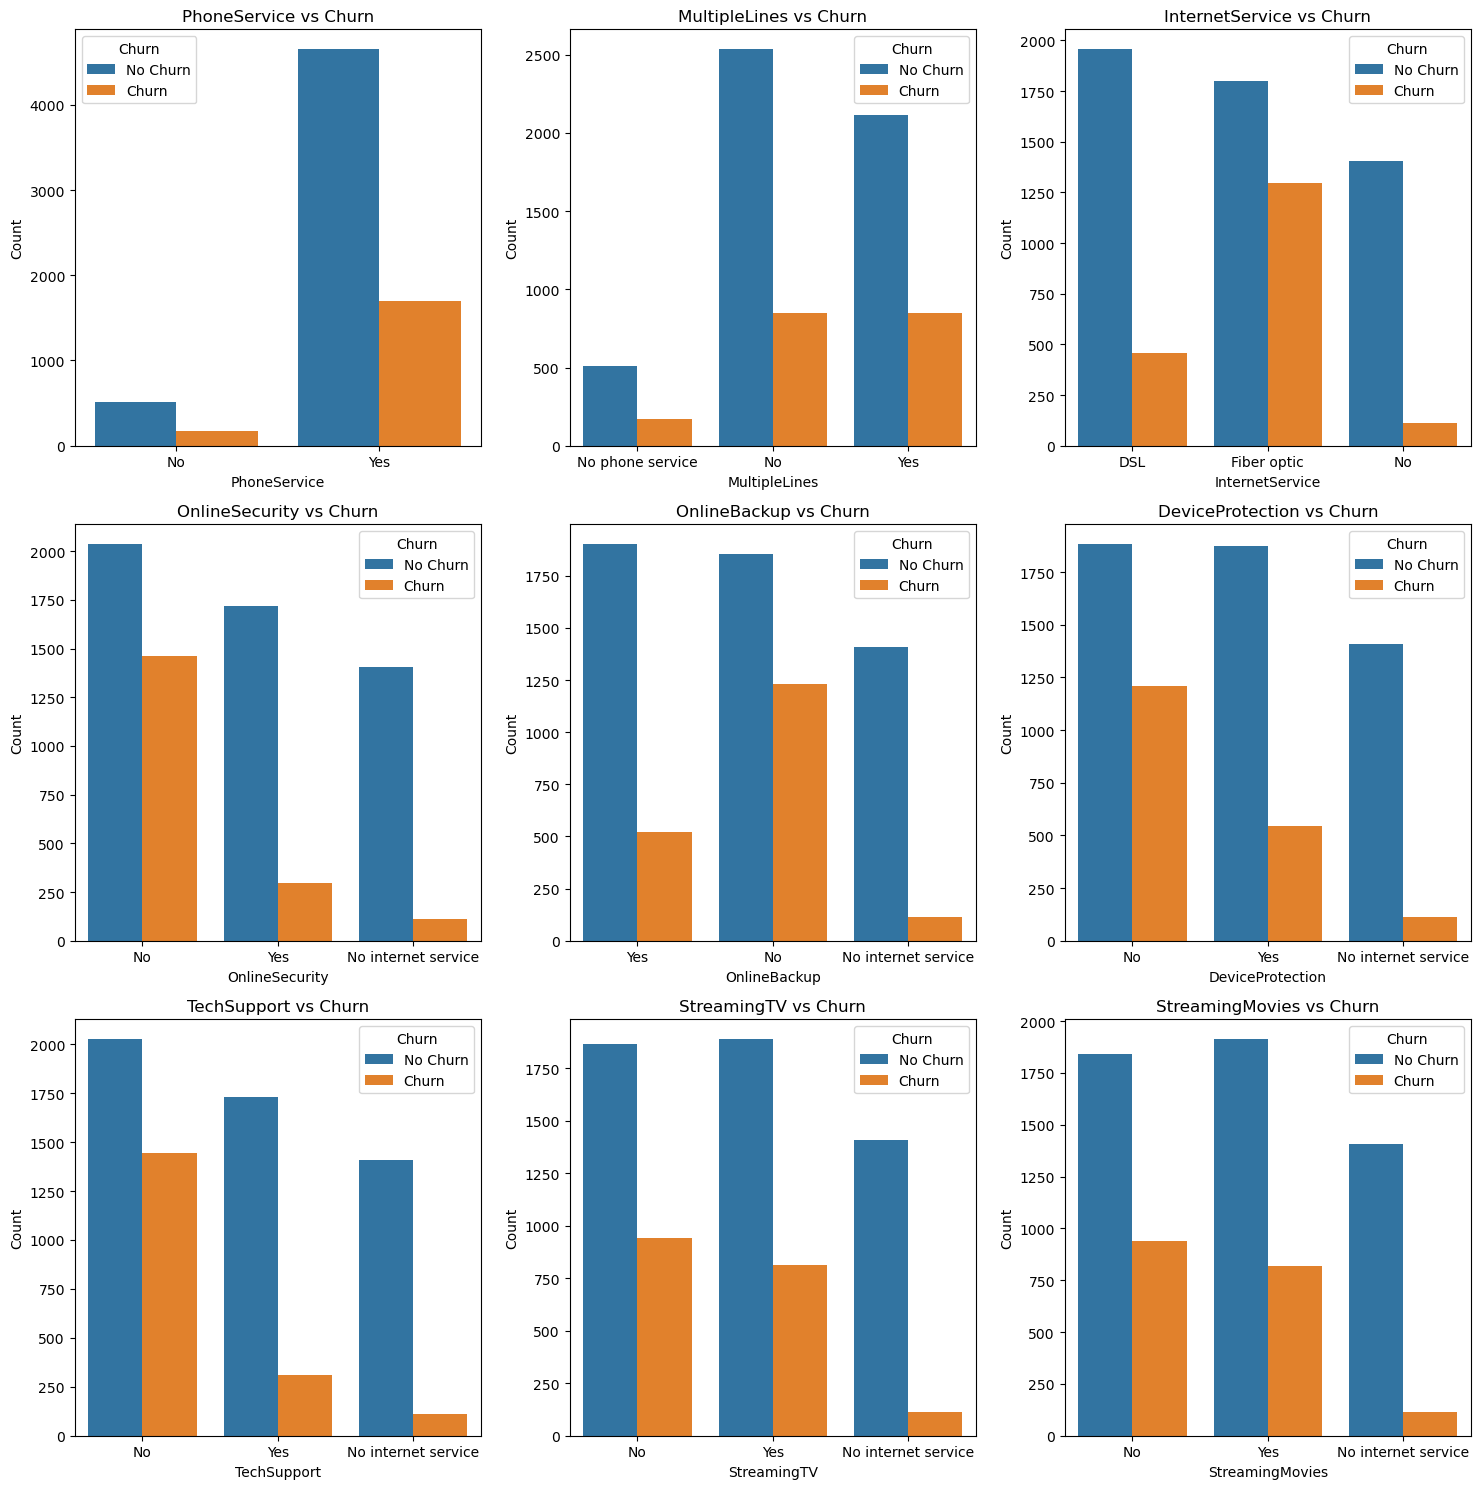

In [63]:

# List of categorical columns to compare with 'Churn'
categorical_columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate through each categorical column and create a countplot
for i, col in enumerate(categorical_columns):
    row = i // 3
    col_idx = i % 3  # Use a different variable name for the column index

    sns.countplot(data=df_encoded, x=col, hue='Churn', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} vs Churn')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')
    axes[row, col_idx].legend(title='Churn', labels=['No Churn', 'Churn'])

# Adjust layout
plt.tight_layout()
plt.show()



Customers who do not subscribe to most of the services (online security, online backup, device protection, Tech support, Streaming TV and Streaming movies services) are among the churn customers

## Project's findings based on the analysis above

Summary of some of the project's findings as regards factors influencing churn customers

1. The customar churn rates is 26.6% 
2. Customers who have short tenuere are likely to Churn
3. Customers who use electronic check method are the highest among those who churns
4. Higher charges affects customer loyalty as the analysis shows that more customer churns as the charges increases
5. The fewer services the customers subscribed to the likelyhood of those customers churning. 